In [13]:
!pip install opendatasets

In [30]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


od.download(
    "https://www.kaggle.com/datasets/uciml/biomechanical-features-of-orthopedic-patients/data?select=column_3C_weka.csv")



Skipping, found downloaded files in "./biomechanical-features-of-orthopedic-patients" (use force=True to force download)


In [17]:
file =('/content/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv')
ds = pd.read_csv(file)


## Initial Data Inspection


Display the first few rows, check the data types, and look for missing values.

In [18]:
# Display the first few rows
display(ds.head())

# Check data types
display(ds.info())

# Check for missing values
display(ds.isnull().sum())

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


None

,0
pelvic_incidence,0
pelvic_tilt,0
lumbar_lordosis_angle,0
sacral_slope,0
pelvic_radius,0
degree_spondylolisthesis,0
class,0


## Analyze Categorical Features

### Subtask:
Display classed and their count , and visualize the distribution of the 'class' column using a bar chart and a pie chart with percentages.

In [24]:
# Get the value counts of the 'class' column
class_counts = ds['class'].value_counts()
display(class_counts)

,count
class,
Spondylolisthesis,150
Normal,100
Hernia,60


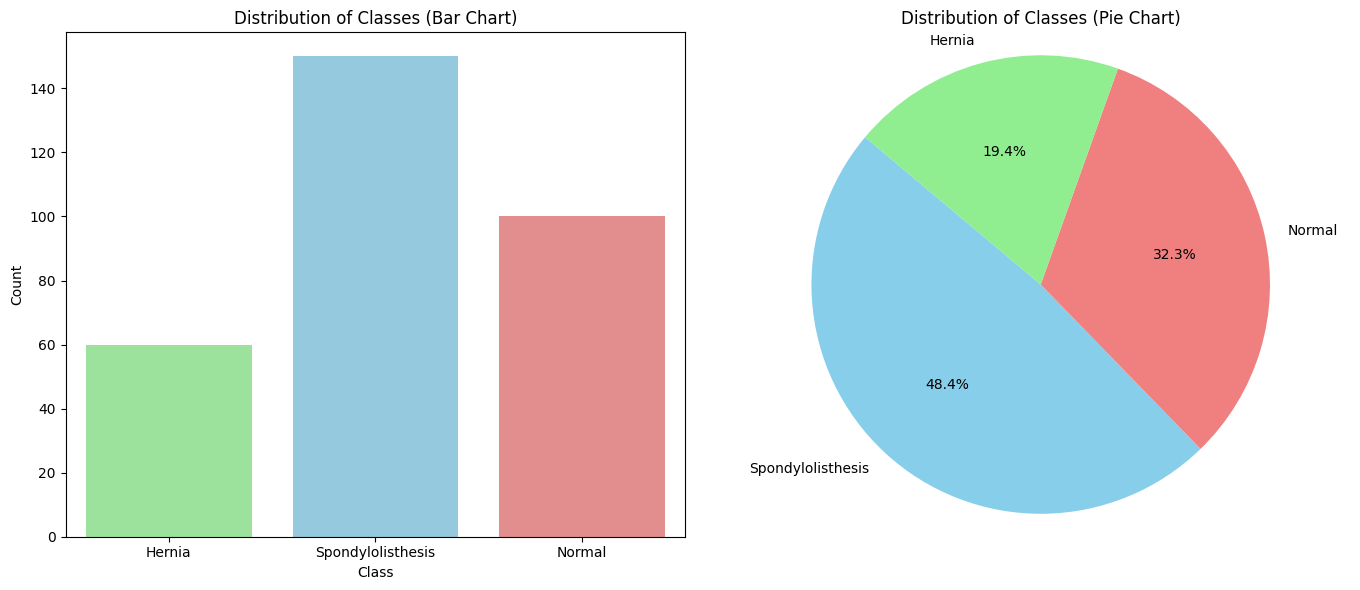

In [29]:
# Bar chart and Pie chart for class distribution side-by-side

class_counts = ds['class'].value_counts()

# Define a color map for consistent colors
class_colors = {'Spondylolisthesis': 'skyblue', 'Normal': 'lightcoral', 'Hernia': 'lightgreen'}

plt.figure(figsize=(14, 6)) # Adjust figure size to accommodate two plots

# Bar chart subplot
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.countplot(data=ds, x='class', hue='class', palette=class_colors, legend=False)
plt.title('Distribution of Classes (Bar Chart)')
plt.xlabel('Class')
plt.ylabel('Count')

# Pie chart subplot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
# Ensure the order of colors matches the order of labels in the pie chart
pie_colors = [class_colors[label] for label in class_counts.index]
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
plt.title('Distribution of Classes (Pie Chart)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Explore Relationships

### Subtask:
Visualize relationships between features using pair plots.

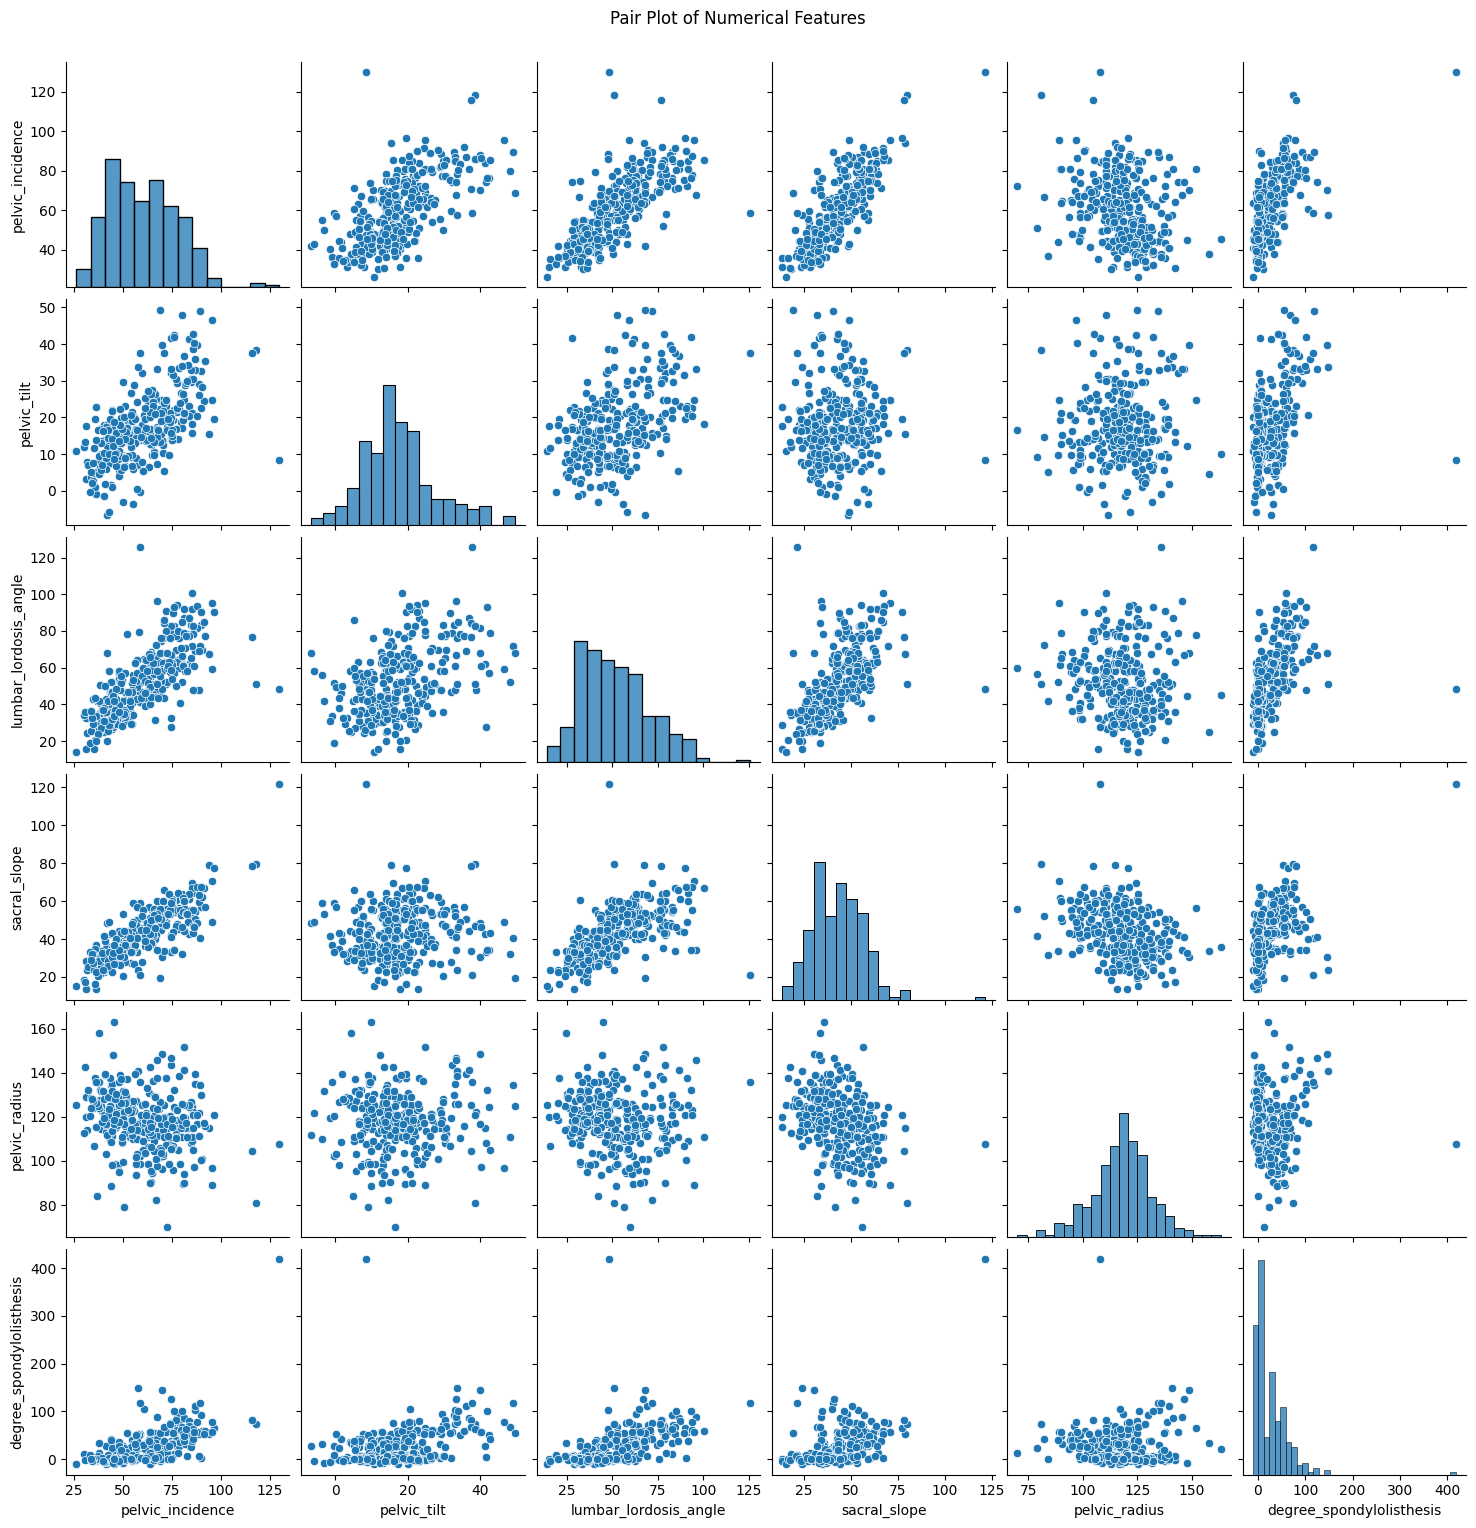

In [25]:
# Select only numerical columns for the pair plot
numerical_cols = ds.select_dtypes(include=['float64', 'int64']).columns

sns.pairplot(ds[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02) # Add a title
plt.show()

## Explore Relationships between Numerical Features and Class

### Subtask:
Visualize the relationships between numerical features and the 'class' column using box plots.

/tmp/ipython-input-31-3678552612.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ds, x='class', y=col, palette=class_colors)
/tmp/ipython-input-31-3678552612.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ds, x='class', y=col, palette=class_colors)
/tmp/ipython-input-31-3678552612.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ds, x='class', y=col, palette=class_colors)
/tmp/ipython-input-31-3678552612.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

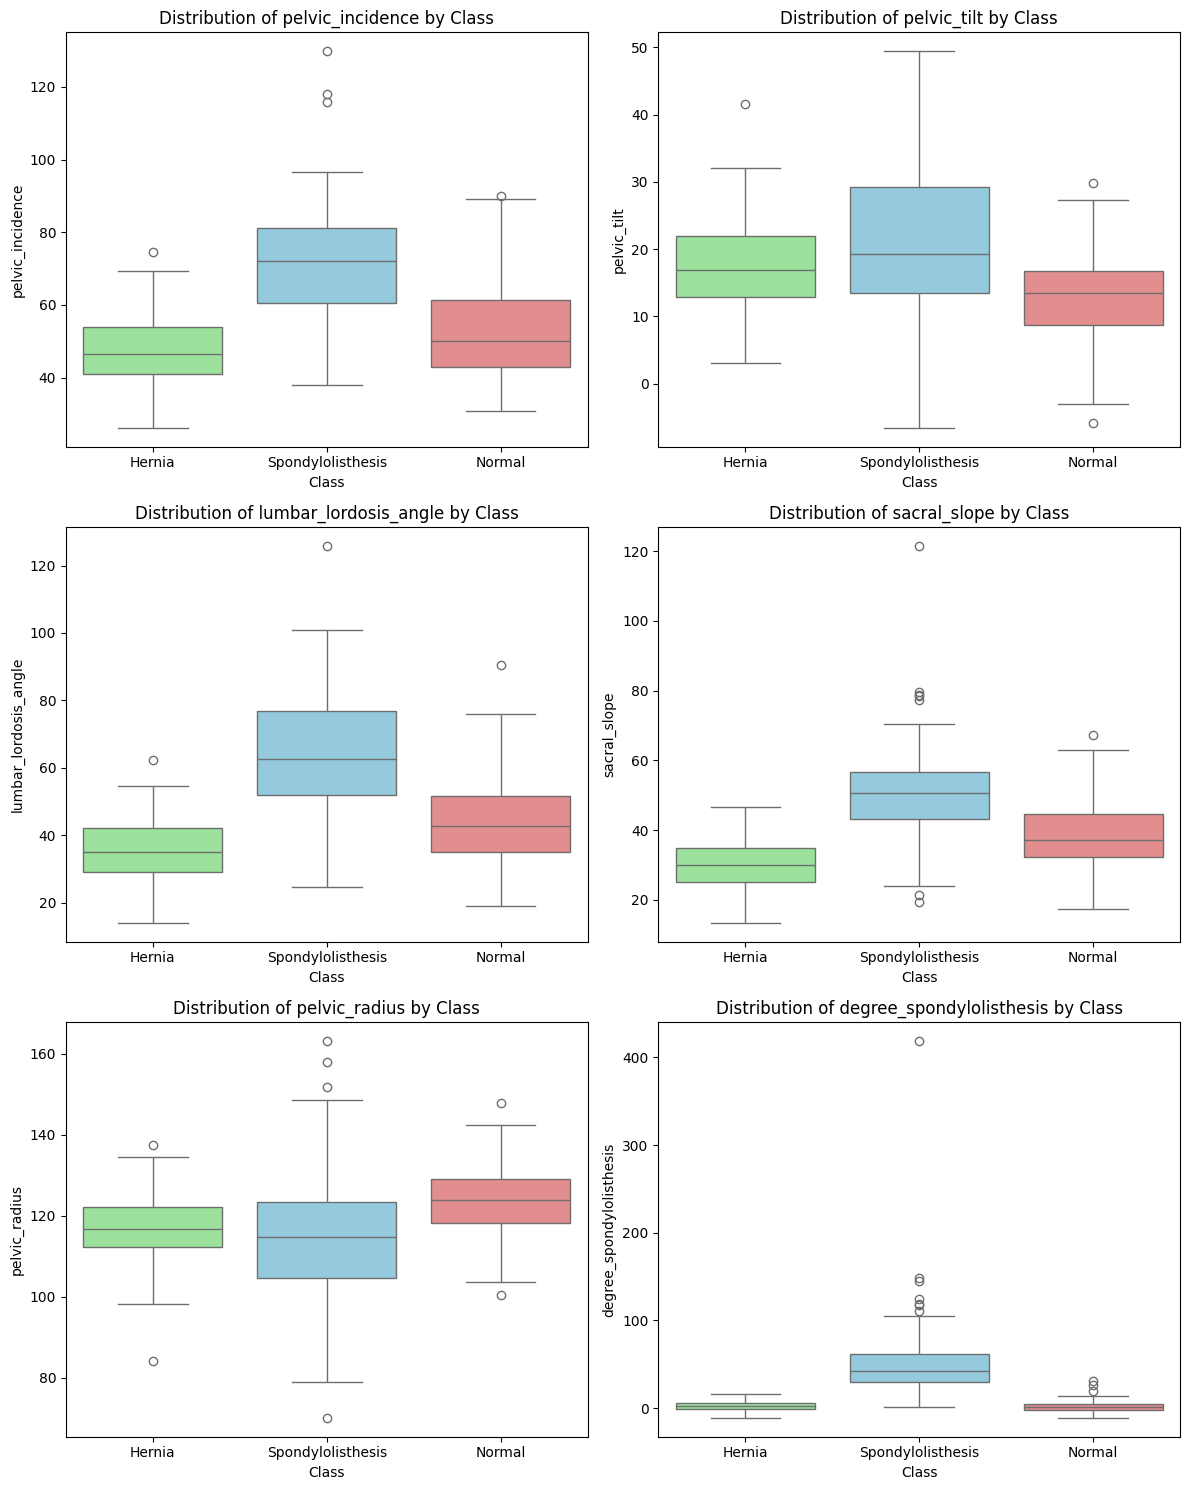

In [31]:
numerical_cols = ds.select_dtypes(include=['float64', 'int64']).columns
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=ds, x='class', y=col, palette=class_colors)
    plt.title(f'Distribution of {col} by Class')
    plt.xlabel('Class')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## Explore Relationships (Correlation Map)

### Subtask:
Calculate and visualize the correlation matrix of numerical features.

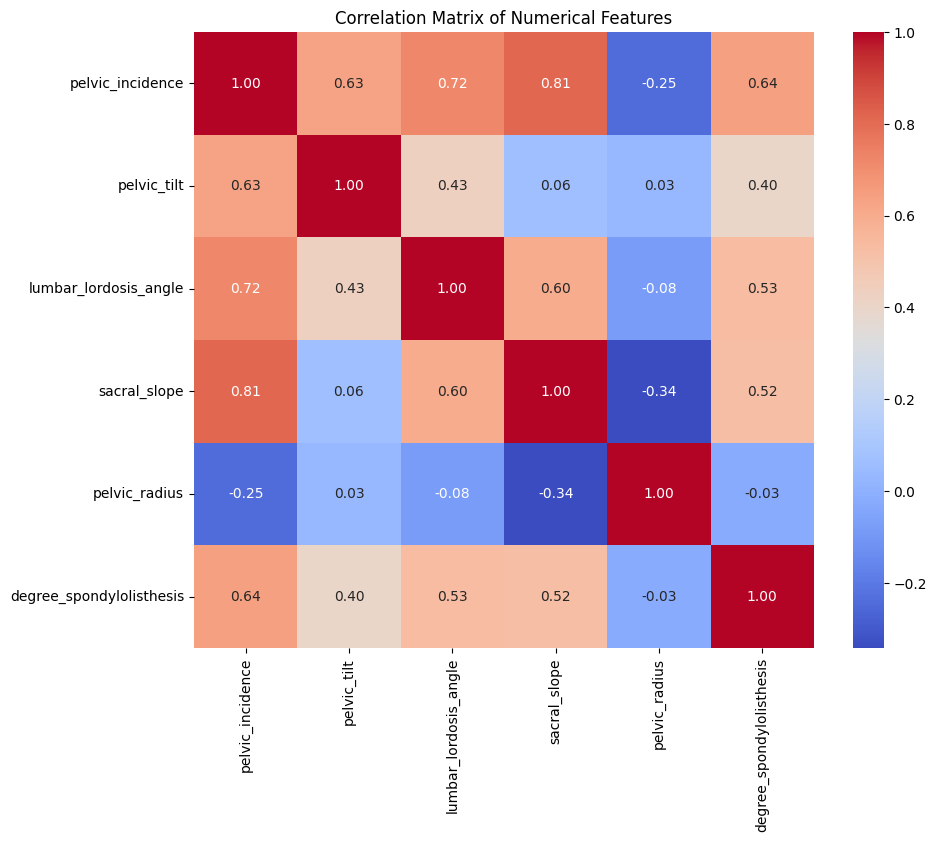

In [27]:
# Calculate the correlation matrix for numerical features
numerical_cols = ds.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = ds[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Task
Perform PCA on the biomechanical features dataset, grouping the 'classes' into 'Normal' and 'Abnormal' categories, and visualize the results to see if the biomechanical measurements cluster differently for normal vs. abnormal cases. Use the dataset from "https://www.kaggle.com/datasets/uciml/biomechanical-features-of-orthopedic-patients/data?select=column_3C_weka.csv".

## Create 'abnormal' class

### Subtask:
Create a new column or modify the existing 'class' column to have 'Normal' and 'Abnormal' categories.


**Reasoning**:
Define a function to group the classes and apply it to create a new column.



In [32]:
def group_class(class_label):
    """Groups class labels into 'Normal' and 'Abnormal'."""
    if class_label == 'Normal':
        return 'Normal'
    else:
        return 'Abnormal'

# Apply the function to create the new 'abnormal_class' column
ds['abnormal_class'] = ds['class'].apply(group_class)

# Display the first few rows with the new column
display(ds.head())

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,abnormal_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia,Abnormal


## Select features

### Subtask:
Select the numerical features for the filtered data.


**Reasoning**:
Select the numerical columns from the filtered dataframe and the target variable for PCA.



In [36]:
# Select numerical features from the filtered data
numerical_cols_filtered = ds.select_dtypes(include=['float64', 'int64']).columns
X_filtered = ds[numerical_cols_filtered]

# Select the target variable for coloring
y_filtered = ds['abnormal_class']

display(X_filtered.head())
display(y_filtered.head())

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


,abnormal_class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal


**Reasoning**:
Standardize the numerical features and perform PCA, then visualize the results.



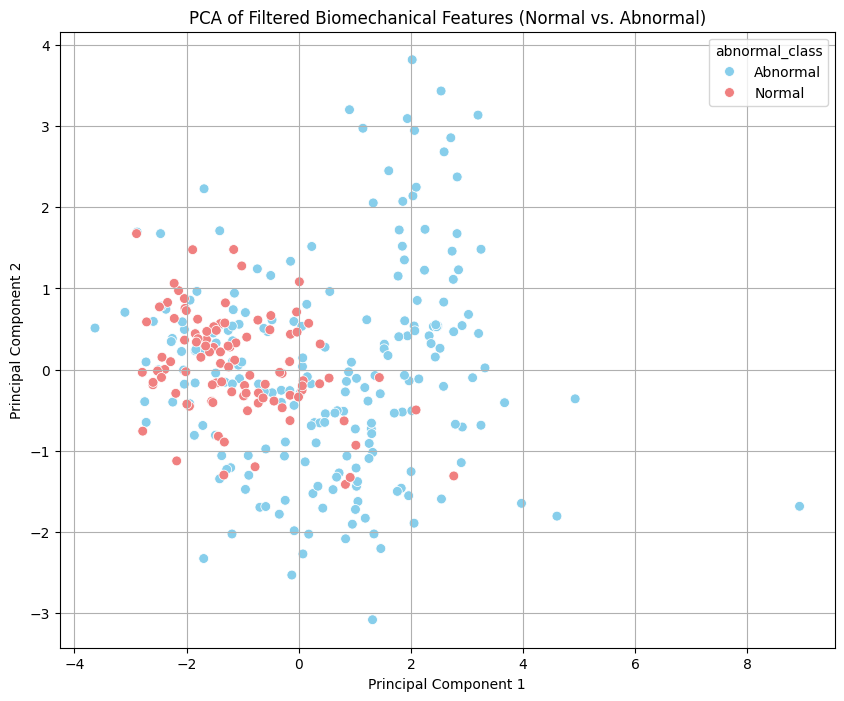

In [37]:
# Standardize the numerical features
scaler = StandardScaler()
X_filtered_scaled = scaler.fit_transform(X_filtered)

# Perform PCA
pca = PCA(n_components=2) # Reduce to 2 components for visualization
X_filtered_pca = pca.fit_transform(X_filtered_scaled)

# Create a DataFrame with the PCA results and abnormal_class labels
pca_filtered_df = pd.DataFrame(data = X_filtered_pca, columns = ['principal component 1', 'principal component 2'])
pca_filtered_df = pd.concat([pca_filtered_df, y_filtered], axis = 1)

# Define colors for the abnormal_class
abnormal_class_colors = {'Normal': 'lightcoral', 'Abnormal': 'skyblue'}

# Visualize the PCA results, colored by abnormal_class
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_filtered_df, x='principal component 1', y='principal component 2', hue='abnormal_class', palette=abnormal_class_colors, s=50)
plt.title('PCA of Filtered Biomechanical Features (Normal vs. Abnormal)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Summary
Based on the EDA performed:

*   **Dataset Overview**: The dataset contains information about biomechanical features of orthopedic patients and their classification into three categories: 'Spondylolisthesis', 'Normal', and 'Hernia'. There are no missing values in the dataset.

*   **Class Distribution**: The 'Spondylolisthesis' class is the most frequent, followed by 'Normal' and then 'Hernia'.

*   **Numerical Feature Relationships (features linearly dependent)**: The pair plots revealed varying degrees of correlation between the numerical features. Some pairs, like `pelvic_incidence` and `sacral_slope`, show a strong positive linear relationship. The correlation heatmap further visualizes these relationships, showing the strength and direction of linear correlations between all pairs of numerical features.


*   **Numerical Features by Class (Correlation with spinal abnormalities)**: The box plots demonstrate that the distributions of numerical features differ across the three classes. This suggests that these biomechanical features are indeed relevant for distinguishing between the orthopedic conditions. For example, `degree_spondylolisthesis` shows a clear separation between the 'Spondylolisthesis' class and the other two classes, with significantly higher values for 'Spondylolisthesis'.


 *   While there is some separation, the two clusters in the PCA plot overlap, suggesting that the first two principal components do not perfectly distinguish between Normal and Abnormal cases.

* the correlation heatmap suggest a notable level of multicollinearity between `sacral_slope` and `pelvic_incidence`, this can be problematic for regression tasks but not for classifications.

 **The box plots also indicate the presence of potential outliers in some of the numerical features.**
